In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

data = pd.read_csv('flight.csv')
df = data.copy()

# Exploratory Data Analysis (EDA)

### Check Null Value, Missing Value, and Data Types

In [2]:
# df.head(5)
df[df['WORK_CITY']=='.']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
20,21501,7/30/2008,11/21/2008,Male,6,.,beijing,CN,49.0,3/31/2014,106,220641,69566.0,122763.0,167113,3/28/2014,4,6.438095,31,4,1.369404,251134,9
27,47114,1/15/2005,3/17/2005,Male,6,.,beijing,CN,47.0,3/31/2014,74,209810,101398.0,83139.0,148685,3/21/2014,11,9.493151,51,8,1.433364,235176,14
40,18793,4/25/2006,6/2/2006,Male,6,.,beijing,CN,48.0,3/31/2014,98,191809,88788.0,85119.0,137876,3/30/2014,2,7.505155,46,11,1.458541,210435,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61806,4388,4/20/2011,12/10/2011,Male,4,.,beijing,CN,40.0,3/31/2014,2,634,756.0,0.0,1586,2/1/2013,425,1.000000,1,0,0.571627,634,0
62035,10787,8/29/2012,10/16/2013,Male,6,.,beijing,CN,55.0,3/31/2014,2,776,0.0,1044.0,1199,10/18/2013,166,2.000000,2,0,0.707698,1133,3
62099,41502,1/1/2012,1/1/2012,Female,4,.,shanghai,CN,44.0,3/31/2014,2,692,NaN,0.0,2085,6/5/2012,666,2.000000,2,0,0.400000,692,0
62546,15528,6/3/2012,6/3/2012,Male,4,.,beijing,CN,44.0,3/31/2014,2,576,970.0,0.0,1629,3/14/2013,384,284.000000,284,0,0.417772,576,0


**There are 667 rows from WORK_CITY and WORK_PROVINCE feature with a single character only (.) instead of the name of the city**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

**The following feature has a missing value on it:**
1. GENDER
2. WORK_CITY
3. WORK_PROVINCE
4. WORK_COUNTRY
5. AGE
6. SUM_YR_1
7. SUM_YR_2

**Also, the date time features like FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE is not on the proper types as well**

### Check Duplicate Values

In [5]:
df.duplicated().sum()

0

**No duplicate values found on the dataset**

### Descriptive Analysis

In [6]:
numericals = ['AGE', 'FFP_TIER', 'EXCHANGE_COUNT','FLIGHT_COUNT', 'BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL', 'MAX_INTERVAL','avg_discount','Points_Sum','Point_NotFlight']
categoricals = ['FFP_DATE','GENDER','FIRST_FLIGHT_DATE','WORK_CITY', 'WORK_PROVINCE','WORK_COUNTRY','LAST_FLIGHT_DATE']

#LOAD_TIME only contain one value

In [7]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**Almost all the features are having a quite major of the gap between min and max OR Q3 and max (outliers indications), except for the following features:**
1. FFP_TIER
2. EXCHANGE_COUNT
3. avg_discount

### Univariate Analysis

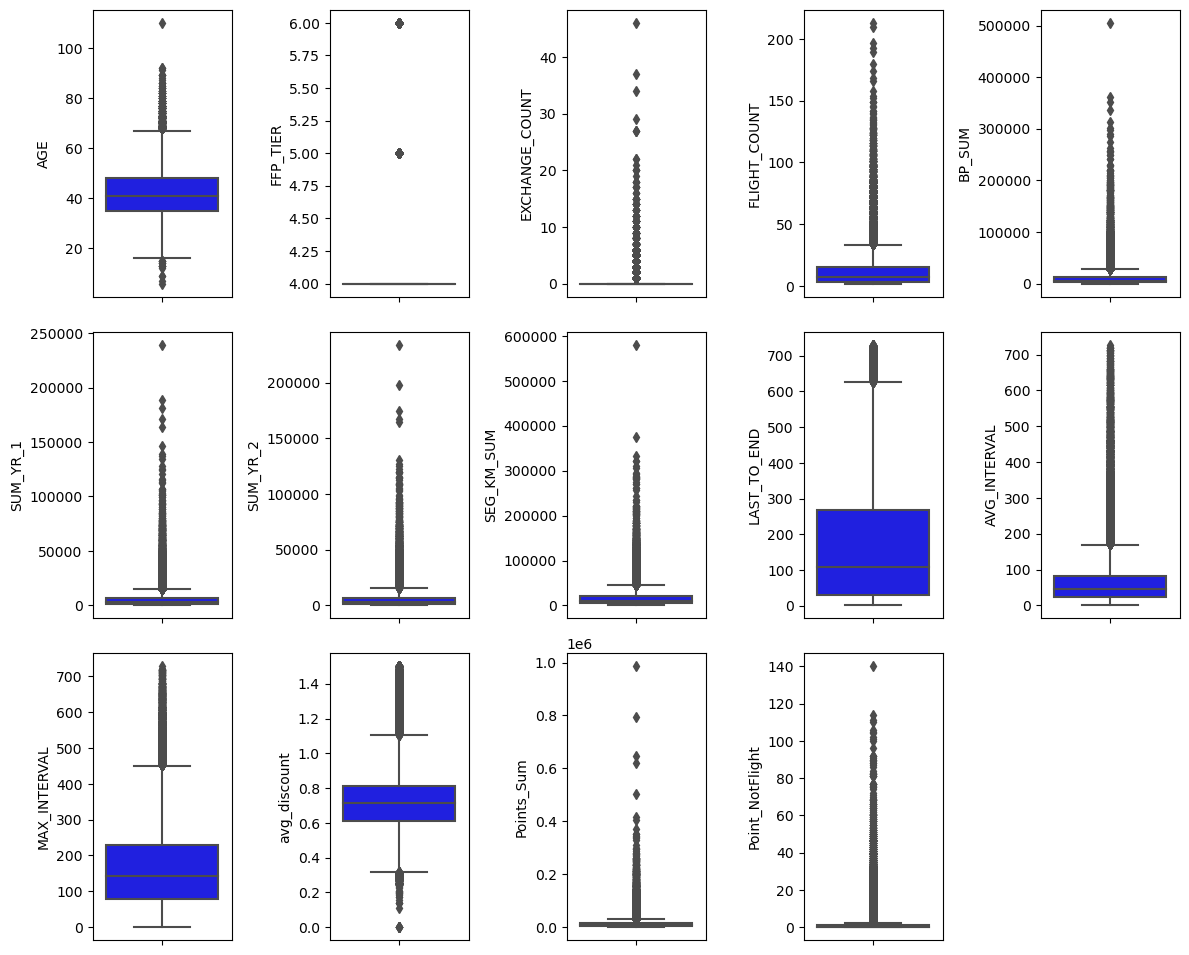

In [8]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.boxplot(y=df[numericals[i]], color='blue', orient='v')
    plt.tight_layout()

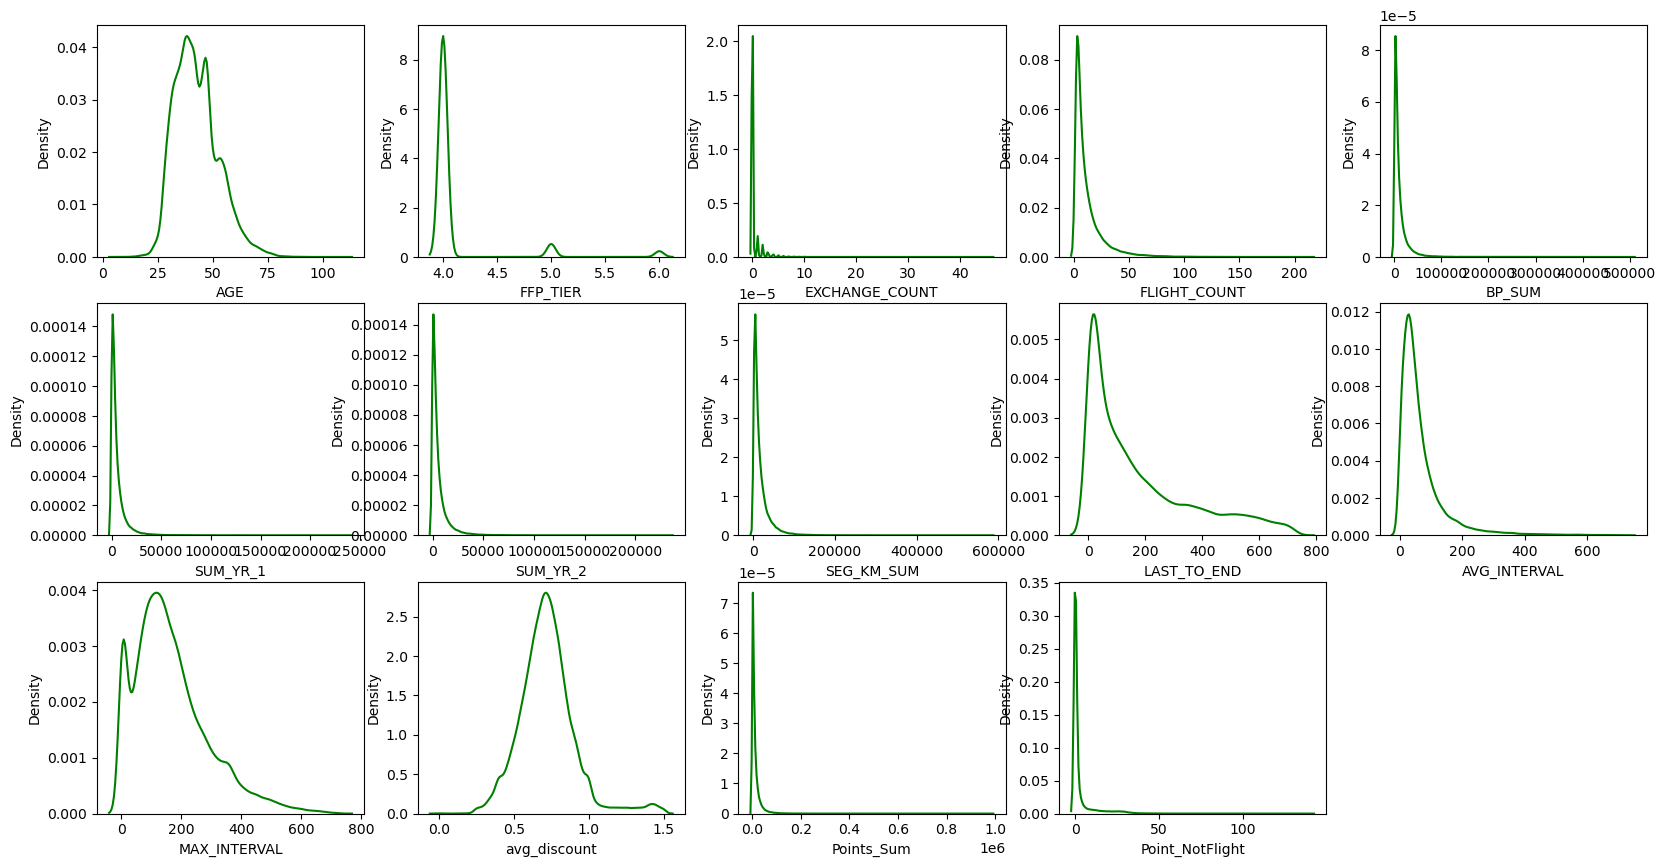

In [9]:
plt.figure(figsize=(20,50))
for i in range(len(numericals)):
    plt.subplot(len(numericals), 5, i+1)
    sns.kdeplot(x=df[numericals[i]], color='green')

**The only feature with normal distribution is AGE**

### Multivariate Analysis

<AxesSubplot:>

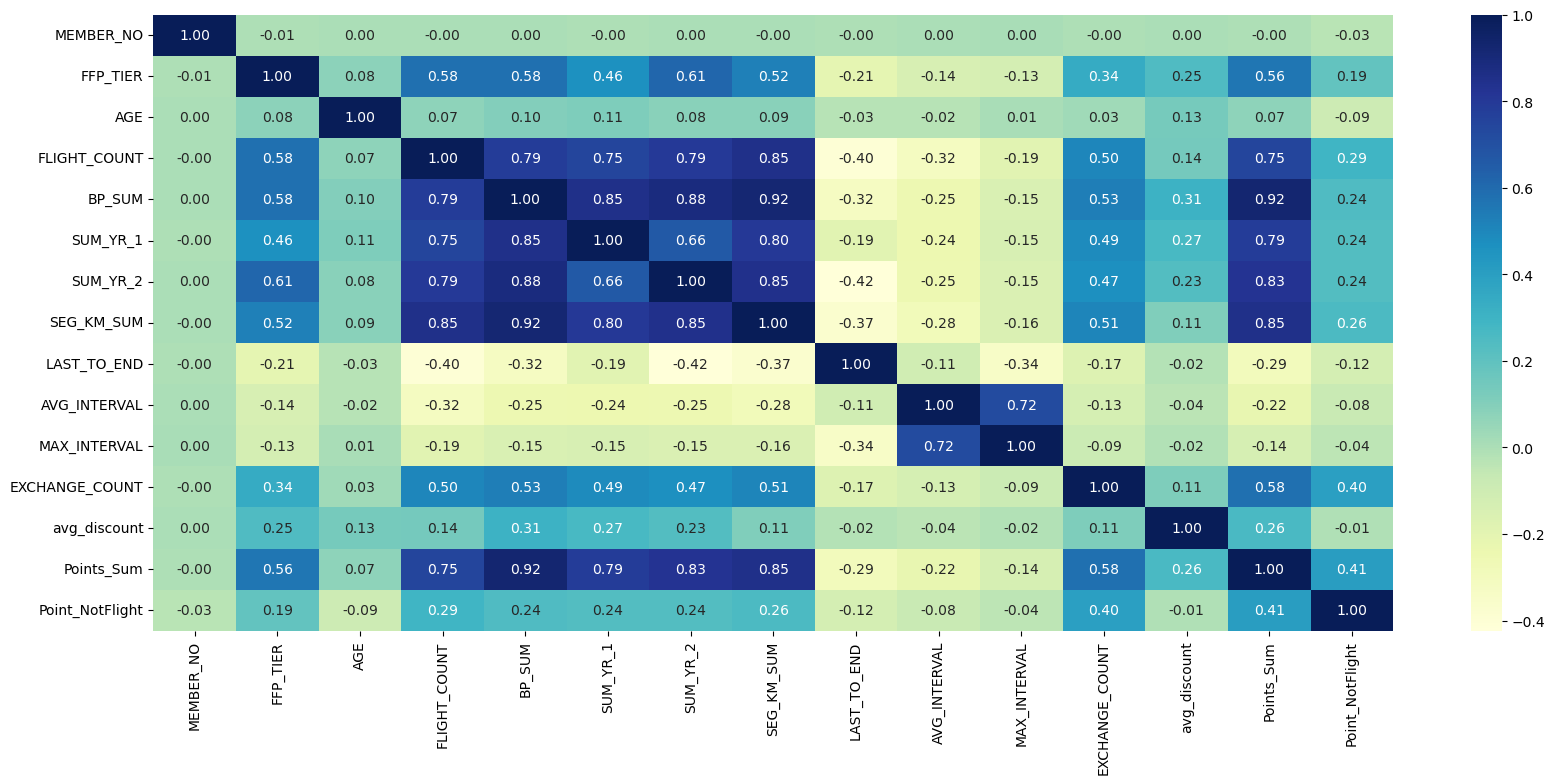

In [10]:
corr = df.corr(method='pearson')

plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')

In [11]:
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7: # jika korelasi lebih besar dari 0.7
            print(f"{corr.columns[i]} and {corr.columns[j]} have a correlation of \033[1m{corr.iloc[i, j]:.2f}\033[0m")
            high_corr.append((corr.columns[i], corr.columns[j]))

print(f"Features with High Correlation: {high_corr}")

BP_SUM and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_1 and FLIGHT_COUNT have a correlation of 0.75
SUM_YR_1 and BP_SUM have a correlation of 0.85
SUM_YR_2 and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_2 and BP_SUM have a correlation of 0.88
SEG_KM_SUM and FLIGHT_COUNT have a correlation of 0.85
SEG_KM_SUM and BP_SUM have a correlation of 0.92
SEG_KM_SUM and SUM_YR_1 have a correlation of 0.80
SEG_KM_SUM and SUM_YR_2 have a correlation of 0.85
MAX_INTERVAL and AVG_INTERVAL have a correlation of 0.72
Points_Sum and FLIGHT_COUNT have a correlation of 0.75
Points_Sum and BP_SUM have a correlation of 0.92
Points_Sum and SUM_YR_1 have a correlation of 0.79
Points_Sum and SUM_YR_2 have a correlation of 0.83
Points_Sum and SEG_KM_SUM have a correlation of 0.85
Features with High Correlation: [('BP_SUM', 'FLIGHT_COUNT'), ('SUM_YR_1', 'FLIGHT_COUNT'), ('SUM_YR_1', 'BP_SUM'), ('SUM_YR_2', 'FLIGHT_COUNT'), ('SUM_YR_2', 'BP_SUM'), ('SEG_KM_SUM', 'FLIGHT_COUNT'), ('SEG_KM_SUM', 'BP_SUM'), 

**Based on the multivariate analysis above, some features have high correlation scores with the other feature. This means there is a redundant possibility among those features. Thus, it needs further analysis to determine whether one of the features should be deleted or not**

**Moreover, since the date-time feature such as FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE are already represented by the AVG_INTERVAL, which informed the average flight time and the maximum flight time, it will be deleted in the next step**

# Data Preprocessing

### Handling Missing and Incorrect Value

In [12]:
df[categoricals].describe()

,FFP_DATE,GENDER,FIRST_FLIGHT_DATE,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LAST_FLIGHT_DATE
count,62988,62985,62988,60719,59740,62962,62988
unique,3068,2,3406,3234,1165,118,731
top,1/13/2011,Male,2/16/2013,guangzhou,guangdong,CN,3/31/2014
freq,184,48134,96,9386,17509,57748,959


In [13]:
mode_value_work_city = df['WORK_CITY'].mode()[0]
mode_value_work_province = df['WORK_PROVINCE'].mode()[0]

df['WORK_CITY'] = df['WORK_CITY'].replace('.', mode_value_work_city)
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].replace('.', mode_value_work_province)

In [14]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,guangzhou,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,guangzhou,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [15]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [16]:
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)

df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)

**Filling the missing value with Mean/Median/Mode**

In [17]:
#Deleting Member ID Column
df = df.drop(columns=['MEMBER_NO'])

In [18]:
df.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
54648,10/10/2007,4/23/2008,Male,4,shanghai,shanghai,CN,39.0,3/31/2014,2,2270,640.0,0.0,2574,8/4/2012,606,39.0,39,0,0.800000,2270,0
49246,4/10/2008,9/23/2008,Male,4,guangzhou,guangdong,CN,59.0,3/31/2014,3,2927,1308.0,1448.0,3743,10/5/2013,179,210.0,342,0,0.768688,2927,0
59464,9/6/2012,9/13/2012,Male,4,HONGKONG,-,HK,36.0,3/31/2014,2,1003,1108.0,0.0,1742,2/2/2013,424,142.0,142,0,0.775000,1003,0
56969,11/26/2004,3/20/2005,Male,4,guangzhoushi,guangdongsheng,CN,42.0,3/31/2014,2,1291,1688.0,0.0,2750,1/26/2013,431,2.0,2,0,0.625000,1291,0
56920,10/30/2009,10/31/2009,Female,4,hanjiang,jiangsu,CN,30.0,3/31/2014,3,1344,826.0,1062.0,3237,9/22/2013,192,256.5,499,0,0.533333,3092,19


### Encode All Categoricals Value

In [19]:
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
df_encode = df.copy()
for i in cats:
    df_encode[i] = df_encode[i].astype('category').cat.codes

In [20]:
df_encode.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
47174,1/12/2006,6/18/2006,1,4,2684,1060,24,47.0,3/31/2014,3,2893,1280.0,0.0,4056,10/17/2012,532,71.500000,78,1,0.796746,6507,3
49251,11/6/2011,11/6/2011,0,4,2731,906,24,18.0,3/31/2014,2,1302,2563.0,0.0,4110,8/20/2012,590,5.000000,5,0,0.700000,2802,1
3618,7/2/2008,3/31/2009,1,5,2074,906,24,34.0,3/31/2014,47,34356,18601.0,19519.0,56174,3/22/2014,10,15.391304,60,1,0.716850,41126,15
39961,5/1/2012,5/19/2012,0,4,2966,1066,24,30.0,3/31/2014,10,4582,2046.0,0.0,7617,8/13/2012,597,9.555556,40,0,0.611954,4582,0
61752,5/28/2007,9/16/2007,1,4,2310,890,24,54.0,3/31/2014,2,714,0.0,1234.0,1154,5/20/2013,317,43.000000,43,0,0.795321,714,0


### Removing Redundant and Unnecessary Features

**Based on the correlation analysis before and the Feature Importance analysis, therefore, the following features will be deleted due to redundant and unnecessary value:**
1. FLIGHT_COUNT
2. BP_SUM
3. SUM_YR_1
4. SUM_YR_2
5. SEG_KM_SUM
6. MAX_INTERVAL
7. LAST_FLIGHT_DATE
8. FFP_DATE 
9. FIRST_FLIGHT_DATE
10. LOAD_TIME

In [21]:
df_encode.drop(columns=['FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM',
                        'MAX_INTERVAL', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'], inplace=True)

In [22]:
df_encode.sample(5)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
32589,1,4,2690,906,24,35.0,203,31.166667,0,0.634527,4697,0
14253,1,5,2074,906,24,41.0,1,24.888889,0,0.684473,18452,6
53542,0,4,2731,906,24,49.0,12,1.000000,0,0.809905,1695,0
39788,1,4,3,3,24,37.0,540,53.000000,0,0.947226,4847,0
17415,1,4,2111,941,24,47.0,2,54.833333,0,0.717277,13452,0


### Removing Outliers

In [23]:
def remove_outliers(column):
    filtered_entries = np.array([True] * len(df))
    for col in column:
        Q1 = df_encode[col].quantile(0.25)
        Q3 = df_encode[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1-(1.5*IQR)
        high_limit = Q3+(1.5*IQR)
        filtered_entries = ((df_encode[col] >= low_limit) & (df_encode[col] <= high_limit)) & filtered_entries
    
    return df_encode[filtered_entries]

In [24]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           62988 non-null  int8   
 1   FFP_TIER         62988 non-null  int64  
 2   WORK_CITY        62988 non-null  int16  
 3   WORK_PROVINCE    62988 non-null  int16  
 4   WORK_COUNTRY     62988 non-null  int8   
 5   AGE              62988 non-null  float64
 6   LAST_TO_END      62988 non-null  int64  
 7   AVG_INTERVAL     62988 non-null  float64
 8   EXCHANGE_COUNT   62988 non-null  int64  
 9   avg_discount     62988 non-null  float64
 10  Points_Sum       62988 non-null  int64  
 11  Point_NotFlight  62988 non-null  int64  
dtypes: float64(3), int16(2), int64(5), int8(2)
memory usage: 4.2 MB


In [25]:
df_encode = remove_outliers(df_encode.columns)

In [26]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24760 entries, 1839 to 62974
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           24760 non-null  int8   
 1   FFP_TIER         24760 non-null  int64  
 2   WORK_CITY        24760 non-null  int16  
 3   WORK_PROVINCE    24760 non-null  int16  
 4   WORK_COUNTRY     24760 non-null  int8   
 5   AGE              24760 non-null  float64
 6   LAST_TO_END      24760 non-null  int64  
 7   AVG_INTERVAL     24760 non-null  float64
 8   EXCHANGE_COUNT   24760 non-null  int64  
 9   avg_discount     24760 non-null  float64
 10  Points_Sum       24760 non-null  int64  
 11  Point_NotFlight  24760 non-null  int64  
dtypes: float64(3), int16(2), int64(5), int8(2)
memory usage: 1.8 MB


In [27]:
df_encode.isna().sum()

GENDER             0
FFP_TIER           0
WORK_CITY          0
WORK_PROVINCE      0
WORK_COUNTRY       0
AGE                0
LAST_TO_END        0
AVG_INTERVAL       0
EXCHANGE_COUNT     0
avg_discount       0
Points_Sum         0
Point_NotFlight    0
dtype: int64

### Data Transform

In [28]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(df_encode)
X_std = pd.DataFrame(X_scaled, columns=df_encode.columns)

In [29]:
X_std.describe()

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,24760.0,24760.0,2.476000e+04,2.476000e+04,24760.0,2.476000e+04,2.476000e+04,2.476000e+04,24760.0,2.476000e+04,2.476000e+04,2.476000e+04
mean,0.0,0.0,6.987769e-17,-3.007467e-16,0.0,1.665476e-14,1.005545e-15,-5.444084e-16,0.0,-8.820915e-17,-2.289328e-15,2.336544e-14
std,0.0,0.0,1.000020e+00,1.000020e+00,0.0,1.000020e+00,1.000020e+00,1.000020e+00,0.0,1.000020e+00,1.000020e+00,1.000020e+00
min,0.0,0.0,-3.696146e+00,-1.933878e+00,0.0,-3.001382e+00,-1.035685e+00,-1.498161e+00,0.0,-2.756682e+00,-1.198256e+00,-3.345795e-01
25%,0.0,0.0,-9.839569e-01,-5.714574e-01,0.0,-7.214371e-01,-8.345937e-01,-7.274094e-01,0.0,-6.531797e-01,-7.458720e-01,-3.345795e-01
50%,0.0,0.0,-4.406136e-01,-3.317722e-01,0.0,-3.745353e-02,-3.496089e-01,-2.107017e-01,0.0,1.577895e-02,-3.048177e-01,-3.345795e-01
75%,0.0,0.0,8.747301e-01,5.638935e-01,0.0,6.465301e-01,5.671307e-01,5.613678e-01,0.0,6.759136e-01,4.518866e-01,-3.345795e-01
max,0.0,0.0,2.013487e+00,2.266920e+00,0.0,2.812478e+00,2.660846e+00,2.983955e+00,0.0,2.863428e+00,3.950773e+00,4.673998e+00


### Dimensional Reduction

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_std)
pdf = pd.DataFrame(data = pcs, columns = ['pc1','pc2'])

In [31]:
pdf.describe()

,pc1,pc2
count,2.476000e+04,2.476000e+04
mean,1.777976e-15,-5.882344e-16
std,1.266537e+00,1.221037e+00
min,-3.647312e+00,-3.248459e+00
25%,-8.947288e-01,-8.979587e-01
50%,-1.288650e-01,-7.549516e-02
75%,7.664670e-01,9.215744e-01
max,5.593594e+00,4.414026e+00


# Identify Number of Clusters

### Identify the optimal number of cluster

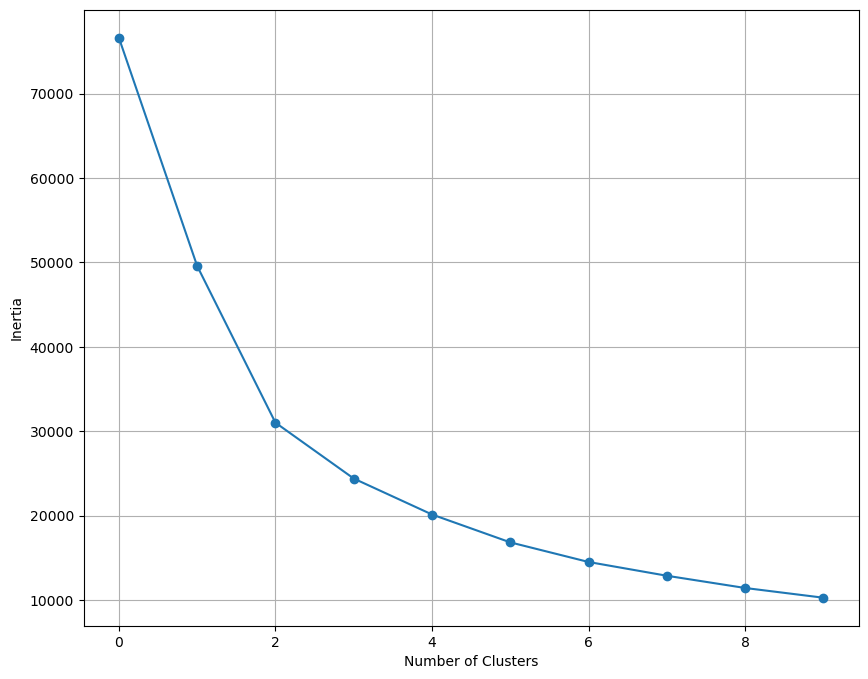

In [32]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pdf.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(inertia,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Based on the Elbow Graph above, the optimal number of clusters would be 3/4/5 clusters**

# Evaluate Model

Silhouette average score for k=2:  0.3515153052774389
Silhouette average score for k=3:  0.3839810618244952
Silhouette average score for k=4:  0.3617565791741102
Silhouette average score for k=5:  0.3372960584142674
Silhouette average score for k=6:  0.36244369987026476


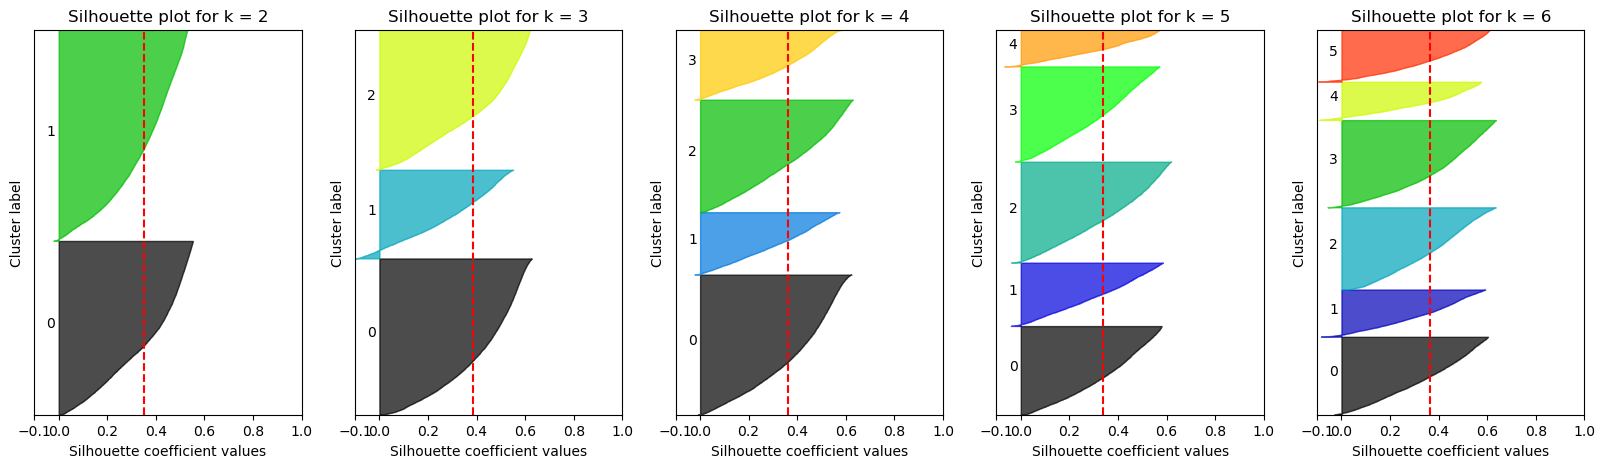

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples

# define range of k values
k_values = range(2, 7)

# create subplots
fig, axs = plt.subplots(1, len(k_values), figsize=(20, 5))

# iterate over each k value
for i, k in enumerate(k_values):
    # fit k-means model
    kmeans_eval = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    #labels = kmeans_eval.labels_
    labels = kmeans_eval.fit_predict(pdf)

    # calculate silhouette score
    silhouette_avg = silhouette_score(pdf, labels)

    # calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pdf, labels)

    print(f"Silhouette average score for k={k}: ", silhouette_avg)
    
    # plot silhouette plot
    y_lower = 10
    axs[i].set_xlim([-0.1, 1])
    axs[i].set_ylim([0, len(pdf) + (k + 1) * 10])
    axs[i].set_title('Silhouette plot for k = {}'.format(k))
    axs[i].set_xlabel('Silhouette coefficient values')
    axs[i].set_ylabel('Cluster label')

    for j in range(k):
        # aggregate silhouette scores for samples in cluster j
        ith_cluster_silhouette_values = sample_silhouette_values[labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0,
                              ith_cluster_silhouette_values,
                              facecolor=color,
                              edgecolor=color,
                              alpha=0.7)

        # label silhouette plots with their cluster numbers at the middle
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # compute new y_lower for next plot
        y_lower = y_upper + 10

    axs[i].axvline(x=silhouette_avg, color='red', linestyle='--')
    axs[i].set_yticks([])
    axs[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


**Based on the width of every cluster and the average silhoueete score, it can be seen that dividing the data into 3/4/5 clusters is the good option. However, based on the silhouette score that calculate the performance of the model, dividing data into 3 clusters is the most optimal option**

# Fitting Model - KMeans

In [34]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(pdf)

In [35]:
pdf['labels'] = kmeans.labels_

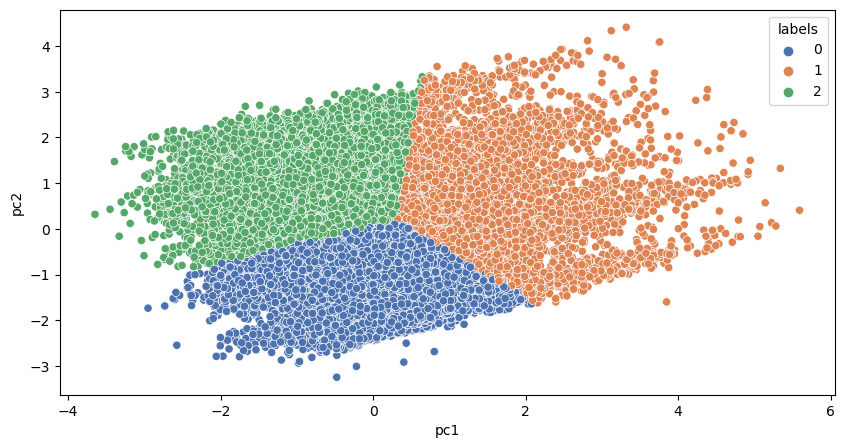

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pdf, x='pc1', y='pc2', hue='labels', palette='deep')
# sns.pairplot(data=pdf, hue='labels', palette='deep')
plt.show()

In [37]:
pdf['labels'].value_counts()

0    10054
2     9002
1     5704
Name: labels, dtype: int64

# Business Insight

### Returning the Preprocessed dataframe to original

In [38]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24760 entries, 1839 to 62974
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           24760 non-null  int8   
 1   FFP_TIER         24760 non-null  int64  
 2   WORK_CITY        24760 non-null  int16  
 3   WORK_PROVINCE    24760 non-null  int16  
 4   WORK_COUNTRY     24760 non-null  int8   
 5   AGE              24760 non-null  float64
 6   LAST_TO_END      24760 non-null  int64  
 7   AVG_INTERVAL     24760 non-null  float64
 8   EXCHANGE_COUNT   24760 non-null  int64  
 9   avg_discount     24760 non-null  float64
 10  Points_Sum       24760 non-null  int64  
 11  Point_NotFlight  24760 non-null  int64  
dtypes: float64(3), int16(2), int64(5), int8(2)
memory usage: 1.8 MB


In [39]:
pdf.drop(columns=['labels'], inplace=True)
for col in cats:
    codes = df_encode[col].unique()
    labels = df[col].unique()
    mapping = dict(zip(codes, labels))
    df_encode[col] = df_encode[col].replace(mapping)

predict = kmeans.predict(pdf)
df_encode['labels_cluster'] = pd.Series(predict, index=df_encode.index)

In [40]:
df_encode

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,labels_cluster
1839,Male,4,guangzhou,beijing,CN,53.0,81,111.200000,0,0.745000,27912,0,1
1970,Male,4,guangzhou,beijing,CN,60.0,90,92.400000,0,0.723333,27912,0,1
2215,Male,4,Los Angeles,beijing,CN,66.0,202,98.000000,0,0.686667,27912,0,1
2271,Male,4,guangzhou,beijing,CN,49.0,130,36.090909,0,0.661214,29209,0,1
2760,Male,4,guiyang,CA,CN,39.0,17,15.714286,0,0.604975,29845,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62947,Male,4,zhanjiang,beijing,CN,62.0,450,101.000000,0,0.850000,1000,0,0
62955,Male,4,Haarlem,sichuan,CN,35.0,528,3.000000,0,0.400000,400,0,2
62961,Male,4,melbourne,guangxi,CN,46.0,471,8.000000,0,0.750000,400,0,0
62962,Male,4,guangzhou,beijing,CN,31.0,492,168.000000,0,0.750000,400,0,0


In [41]:
num_dtypes = ['int32','int64','float64']
cat_dtypes = ['object']

num_df = df_encode.select_dtypes(include=num_dtypes)
cat_df = df_encode.select_dtypes(include=cat_dtypes)

numericals = num_df.columns
categoricals = cat_df.columns

In [42]:
num_info = df_encode[numericals].groupby('labels_cluster').agg(['mean', 'median', 'std', 'min', 'max'])
num_info

FFP_TIER                            AGE                         \
                   mean median  std min max       mean median       std   min   
labels_cluster                                                                  
0                   4.0    4.0  0.0   4   4  41.447769   41.0  8.744617  16.0   
1                   4.0    4.0  0.0   4   4  44.541342   44.0  8.523094  17.0   
2                   4.0    4.0  0.0   4   4  41.910148   41.0  8.723481  16.0   

                     LAST_TO_END                             AVG_INTERVAL  \
                 max        mean median         std min  max         mean   
labels_cluster                                                              
0               67.0  211.516212  161.5  175.657323   1  626    62.264012   
1               67.0   64.675491   36.0   74.876742   1  622    38.232522   
2               67.0  207.177849  158.0  174.324501   1  626    62.295985   

                                                      EXCHANGE_COUNT         \
                   median        std  min         max           mean median   
labels_cluster                                                                
0               56.651515  40.797562  0.0  169.750000            0.0    0.0   
1               34.000000  19.530289  0.0  169.666667            0.0    0.0   
2               56.625000  39.533980  0.0  169.500000            0.0    0.0   

                            avg_discount                                \
                std min max         mean    median       std       min   
labels_cluster                                                           
0               0.0   0   0     0.706798  0.708911  0.150538  0.316667   
1               0.0   0   0     0.747241  0.741896  0.107795  0.340000   
2               0.0   0   0     0.671102  0.673876  0.138933  0.316012   

                            Points_Sum                                    \
                     max          mean   median          std  min    max   
labels_cluster                                                             
0               1.104000   4873.977124   4228.5  3166.946626    0  18415   
1               1.104367  15828.211255  14975.5  5967.111946  522  31585   
2               1.105253   4744.102533   4038.0  3248.869184    0  21807   

               Point_NotFlight                           
                          mean median       std min max  
labels_cluster                                           
0                     0.052119    0.0  0.235320   0   2  
1                     0.401999    0.0  0.637429   0   2  
2                     0.054543    0.0  0.244985   0   2

In [43]:
cat_info = df_encode[categoricals].join(df_encode['labels_cluster']).groupby('labels_cluster').agg(pd.Series.mode)
cat_info

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
labels_cluster,,,,
0,Male,wenzhou,beijing,CN
1,Male,guangzhou,beijing,CN
2,Male,Haarlem,sichuan,CN


In [44]:
df_encode['labels_cluster'].value_counts()

0    10054
2     9002
1     5704
Name: labels_cluster, dtype: int64

### Insight Extraction

Based on the previous clustering analysis, here are the segmentation for every cluster created:
1. Label 0: Male (41++ yo) who are from **Wenzhou, Beijing, China,** with an average flight time of **62 hours** and holds a Tier 4 membership

2. Label 1: Male (44++ yo) who are from **Guangzhou, Beijing, China,** with an average flight time of **38 hours** and holds a Tier 4 membership

3. Label 2: Male (41++ yo) who are from **Haarlem, Sichuan, China,** with an average flight time of **62 hours** and holds a Tier 4 membership

### Business Recommendation

Since people from **Beijing, China** are the highest segment of all, the company might be able to apply some bundling promo trips **from/to Beijing, China** to drive more customers.<br>
Morover, company can target customers with **Tier 4** in their membership to apply some additional discounts or other promos.